This script analyzes the CVE texts pre-processed [here.](https://github.com/Semiu/java-codesecurity/blob/main/2-text-classification-CVE-Commits/1a.%20Pre-processing%20of%20the%20Vulnerabilities%20(CVEs)%20.ipynb)

By treating its specific stop words, it visualizes the tokens in the CVEs to demonstrate the popular vulnerabilities recorded in the NVB's CVEs for Java programming language.

In [1]:
#Import the libaries
import pandas as pd
import seaborn as sns
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Semiu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
#Function to load the vulnerability phrases into a corpus
def load_vulnerability_phrases():
    
    phrases_corpus = []
    
    java_cve_phrase = pd.read_csv("C:\\Users\\Semiu\\Documents\\java-codesecurity\\JavaVulData\\vulnerability_phrases.csv")
    
    for phrase in java_cve_phrase['vulnerability_phrases']:
        #Little pre-processing
        striped_phrase = str(phrase).strip()
        
        phrases_corpus.append(striped_phrase)
        
    return phrases_corpus

In [3]:
#The function return value to be taken into a variable
list_of_phrases = load_vulnerability_phrases()

In [4]:
#Create stop words from fundamental English stop words
stopwords = set(w.rstrip() for w in open(r'C:\Users\Semiu\Documents\java-codesecurity\2-text-classification-CVE-Commits\stopwords.txt'))

# Add more stopwords specific to this problem - as seen in the raw data
#This was iterately expanded
stopwords = stopwords.union({
    'java', 'se', 'vulnerability', 'sdk', 'remote', 'oracle', 'database', 'server', 'attacker', 'sap', 'netweaver', 'android',
'ibm', 'embedded', 'product', 'solution', 'manager', 'xstream', 'allows', 'an', 'unauthenticated', 'component', 'issue',
'discovered', 'noise', 'apache', 'xwiki', 'junit', 'discovered', 'unsafe', 'code', 'netscape', 'microsoft', 'machine', 'virtual',
'bea', 'navigator', 'serversocket', 'weblogic', 'vm', 'development', 'kit', 'jre', 'unspecified', 'unknown', 'sun', 'runtime', 
'environment', 'and', '2d', 'web', 'confidentiality', 'integrity', 'unknown', 'vectors', 'products', 'suite', 'in', 'the', 'availability',
'update', 'mobile', 'cicso', 'mobility', 'tomcat', 'update', 'in', 'earlier', 'openjdk', 'red', 'hat', 'related', 'postgresql', 'netflix',
'issue','deployment', 'attack', 'version', 'compromise', 'i', 'sandbox', 'sandboxed', 'this', 'result', 'affect', 'via', '',
'security', 'service', 'refresh', 'internet', 'access', 'vector', 'cv', 'base', 'score', 'data', 'apis', 'network', 'running',
'applets', 'SDK', 'JDK', 'vulnerabilities', 'it', 'visual', 'studio'})

In [5]:
#Initialize WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [6]:
#Tokenization and Text pre-processing function
def my_tokenizer(s):
    s = s.lower() # downcase
    tokens = nltk.tokenize.word_tokenize(s) # split string into words (tokens)
    tokens = [t for t in tokens if len(t) > 2 or len(t)==1]   # remove short words, they're probably not useful
    tokens = [wordnet_lemmatizer.lemmatize(t) for t in tokens] # put words into base form
    tokens = [t for t in tokens if t not in stopwords] # remove stopwords
    tokens = [t for t in tokens if not any(c.isdigit() for c in t)] # remove any digits, i.e. "7.0"
    return tokens

In [7]:
#Tokenize each of the CVEs in the list_of_CVE phrases
def cve_to_tokens():
    all_tokens = []
    for java_cve in list_of_phrases:
        try:
            java_cve = java_cve.encode('ascii', 'ignore') # this will throw exception if bad characters
            java_cve = java_cve.decode('utf-8')
            tokens = my_tokenizer(java_cve) #Call the my_tokenizer function for each cve in the list_of_phrases
            all_tokens.append(tokens)
        except Exception as e:
            print(e)
    return all_tokens

In [8]:
#list of token variable to hold the cve_to_tokens() function return value
list_of_tokens = cve_to_tokens()

In [9]:
#A function to further process the tokens
def process_tokens(list_of_tokens):
    new_sentence = []
    #For additional pre-processing due to output from tokenization
    eliminate_words = [',',"'",'.','(',')','{','}',':','e.g',';','JDK', 'SDK', 'jdk', 'system', 'application', 'file', 'function', 'aka']
    for token_list in list_of_tokens:
        for token in token_list:
            if token not in eliminate_words:
                new_sentence.append(token)
    return new_sentence

In [10]:
#The processed tokens in a variable
list_of_processed_tokens = process_tokens(list_of_tokens)

In [11]:
#Convert the vulnerabilities tokens to data frame to work with the visualization library
vul_phrases_df = pd.DataFrame(list_of_processed_tokens,columns=["vulnerability_tokens"])

In [12]:
#Save these tokens in a csv file for Git commit analysis
vul_phrases_df.to_csv(r'C:\Users\Semiu\Documents\java-codesecurity\2-text-classification-CVE-Commits\tokens.csv',index=False)

C:\Users\Semiu\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


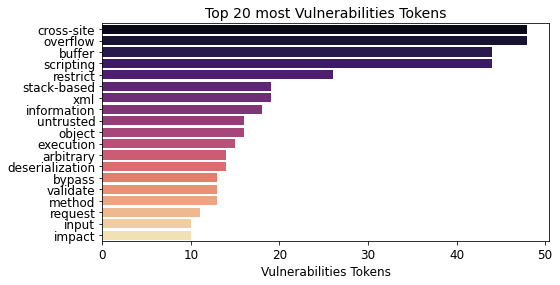

In [13]:
# Plot the Top 20 vulnerabilities tokens
fig, ax = plt.subplots(figsize = (8,4))
sns.barplot(vul_phrases_df['vulnerability_tokens'].value_counts()[1:20].values, vul_phrases_df['vulnerability_tokens'].value_counts()[1:20].index, palette=('magma'));
# customization
plt.xlabel('Vulnerabilities Tokens',fontsize=12)
plt.xticks(size=12)
plt.yticks(size=12)
plt.title('Top 20 most Vulnerabilities Tokens',size=14)
plt.show();

With domain knowledge, it is valid to conclude that, based on the top 20 vulnerability tokens that:

a. cross-site scripting

b. buffer overflow

c. data deserialization

d. input validation for untrusted object

e. validation method bypass, are some of the leading vulnerabilities for Java languages as recorded by the NVB.
